## Kmeans Clustering 
In this notebook we will implement K-means clustering from scratch.

In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
x = np.ones(4)
y = np.ones((4,4))
y[0]=2

In [15]:
# (x-2*y)**2
np.sum((x-2*y)**2,axis=1)

array([36.,  4.,  4.,  4.])

In [47]:
class KMeans():
    def __init__(self, K=5, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        self.centroids = None
    
    def initialize_clusters(self,X):
        indices = np.random.choice(len(X),self.K)
        return X[indices]
    
    def closest_cluster(self,x_sample,centroids):
        distance = np.sum((x_sample - centroids)**2,axis=1)
        closest_distance_index = np.argmin(distance)
        return closest_distance_index
    
    def create_clusters(self,X,centroids):
        
        clusters = [[] for _ in range(self.K)]
        
        for idx,x_sample in enumerate(X):
            cluster_idx = self.closest_cluster(x_sample,centroids)
            clusters[cluster_idx].append(idx)
        
        return clusters
    
    def calculate_centroids(self,clusters,X):
        
        centroids = np.zeros((self.K,self.n_features))
        
        for cluster_idx,cluster in enumerate(clusters):
            if cluster==[]:
                centroids[cluster_idx] = np.array([0]*self.n_features)
            else:
                cluster_mean = np.mean(X[cluster],axis=0)
                centroids[cluster_idx] = cluster_mean
        
        return centroids
                
    
    def fit(self,X):
        self.n_samples,self.n_features = X.shape
        centroids = self.initialize_clusters(X)
        for epoch in range(1,self.max_iters+1):
            clusters = self.create_clusters(X,centroids)
            new_centroids = self.calculate_centroids(clusters,X)
            centroids = new_centroids
        
        self.centroids = centroids
        
    def predict(self,X):
        y_pred =[]
        for x_sample in X:
            cluster_idx = self.closest_cluster(x_sample,self.centroids)
#             print(cluster_idx)
            y_pred.append(cluster_idx)
        
        return y_pred
    
            
        

In [52]:
np.random.seed(22)

num_clusters = 8
num_samples = 1000
cluster_std = 1.0
X, c = make_blobs(n_samples=num_samples, n_features=2, centers=num_clusters, cluster_std=cluster_std)

kmeans = KMeans(K=num_clusters,max_iters=100)
kmeans.fit(X)
y_pred = kmeans.predict(X)

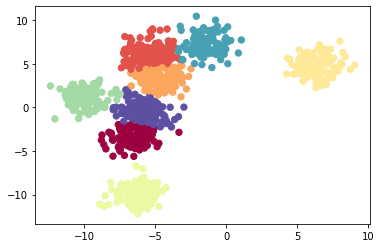

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap=plt.cm.Spectral)